In [ ]:
# Module: python3/3.11.7 
# Environment base: /g/data/xe2/datasets/Environments/paddockenv3_11
# Not using geospatenv because it doesn't have pysheds installed

In [1]:
# Standard library
import os
import pickle

# Dependencies
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from dea_tools.plotting import rgb

# Local imports
os.chdir(os.path.join(os.path.expanduser('~'), "Projects/PaddockTS"))
from DAESIM_preprocess.util import gdata_dir, scratch_dir, visualise_tif_rioxarray, plot_time_series, plot_time_point
from DAESIM_preprocess.topography import show_acc, show_aspect, show_slope, show_ridge_gullies, pysheds_accumulation, catchment_gullies, catchment_ridges, calculate_slope
from DAESIM_preprocess.canopy_height import visualise_canopy_height
from DAESIM_preprocess.sentinel import available_imagery_sentinel, calendar_plot_sentinel, time_lapse

In [50]:
stubs = {
    "MULL": "Mulloon",
    "CRGM": "Craig Moritz Farm",
    "MILG": "Milgadara",
    "ARBO": "Arboreturm",
    "KOWN": "Kowen Forest",
    "ADAM": "Canowindra"
}

In [30]:
# Filepaths
outdir = os.path.join(gdata_dir, "Data/PadSeg/")
visuals_dir = os.path.join(scratch_dir, "Visuals")
stub = "MULL"

In [10]:
%%time
# Calculate the terrain data
filename = os.path.join(outdir, f"{stub}_terrain.tif")
grid, dem, fdir, acc = pysheds_accumulation(filename)
num_catchments = 20
gullies, full_branches = catchment_gullies(grid, fdir, acc, num_catchments)
ridges = catchment_ridges(grid, fdir, acc, full_branches)
slope = calculate_slope(filename)

CPU times: user 25.1 s, sys: 354 ms, total: 25.5 s
Wall time: 22.7 s


In [4]:
# Soils

# # Paddock boundaries
# filename = os.path.join(outdir, f"{stub}_segment.tif")
# ds = rxr.open_rasterio(filename)
# ds.plot()

# False colour NDWI fourier transform
# filename = os.path.join(outdir, f"{stub}.tif")
# ds = rxr.open_rasterio(filename)
# rgb_array = ds.transpose('y', 'x', 'band') / 255.0
# plt.imshow(rgb_array)

# NDVI calendar plot and paddock heatmap
# Fractional cover calendar plot and paddock heatmap
# Property boundaries

In [ ]:
%%time
# Topography
show_ridge_gullies(dem, ridges, gullies)

# Accumulation
show_acc(acc)

# Aspect
show_aspect(fdir)

# Slope
show_slope(slope) 

# Canopy Height
filename = os.path.join(outdir, f"{stub}_canopy_height.tif")
visualise_canopy_height(filename)

In [24]:
# Load the sentinel imagery
filename = os.path.join(outdir, f"{stub}_ds2.pkl")
with open(filename, 'rb') as file:
    ds = pickle.load(file)

In [25]:
ds

<xarray.Dataset>
Dimensions:                     (time: 193, y: 1047, x: 966)
Coordinates:
  * time                        (time) datetime64[ns] 2017-02-04T00:06:22.464...
  * y                           (y) float64 -4.22e+06 -4.22e+06 ... -4.23e+06
  * x                           (x) float64 1.443e+07 1.443e+07 ... 1.444e+07
    spatial_ref                 int32 6933
Data variables: (12/30)
    nbart_coastal_aerosol       (time, y, x) float32 214.0 214.0 ... 437.0 437.0
    nbart_blue                  (time, y, x) float32 242.0 186.0 ... 562.0 570.0
    nbart_green                 (time, y, x) float32 353.0 288.0 ... 881.0 865.0
    nbart_red                   (time, y, x) float32 369.0 311.0 ... 1.234e+03
    nbart_red_edge_1            (time, y, x) float32 647.0 647.0 ... 1.609e+03
    nbart_red_edge_2            (time, y, x) float32 1.553e+03 ... 2.202e+03
    ...                          ...
    oa_s2cloudless_prob         (time, y, x) float32 0.008117 ... 0.0985
    oa_nbart_contiguity         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_s2cloudless_mask         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    NDVI                        (time, y, x) float32 0.7342 0.7388 ... 0.3605
    LAI                         (time, y, x) float32 1.322 1.151 ... 0.6806
    SAVI                        (time, y, x) float32 0.3933 0.3575 ... 0.2355
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [3]:
# Available imagery
available_imagery_sentinel(ds)

# Calendar plot thumbnail
calendar_plot_sentinel(ds)

# Calendar plot detailed
calendar_plot_sentinel(ds, size=5)

# Video
time_lapse(ds)

In [10]:
# Climate
filename = os.path.join(outdir, f"{stub}_ozwald_8day.nc")
ds_ozwald = xr.open_dataset(filename)

filename = os.path.join(outdir, f"{stub}_silo_daily.nc")
ds_silo = xr.open_dataset(filename)

In [14]:
# Making the assumption that the four 5km pixels within 10km are similar, so just choosing the first one. Later will want to be more precise using ANU Climate at 1km resolution. 
ds_silo_point = ds_silo.isel(lat=0, lon=0)

In [15]:
# ds_ozwald

In [16]:
ds_silo_point

<xarray.Dataset>
Dimensions:              (time: 2788)
Coordinates:
    lat                  float64 -35.3
    lon                  float64 149.6
  * time                 (time) datetime64[ns] 2017-01-01 ... 2024-08-19
Data variables:
    daily_rain           (time) float32 ...
    crs                  (time) |S8 ...
    max_temp             (time) float32 ...
    min_temp             (time) float32 ...
    et_morton_actual     (time) float32 ...
    et_morton_potential  (time) float32 ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...

In [27]:
# Combine the datasets along the 'time' dimension
# ds_merged = xr.merge([ds3, ds4, ds5, ds6, ds7, ds8, ds9])
df = ds_silo_point.to_dataframe().reset_index()
df = df.drop(columns=["lat", "lon", "crs"])
df = df.set_index('time')

# # Rename the columns to match Alex's DAESim_forcing.csv
abbreviations = {
    "daily_rain" : "Rainfall",
    "max_temp" : "Maximum temperature",
    "min_temp" : "Minimum temperature",
    "Ssoil":"Soil moisture",
    "et_morton_actual": "Actual Evapotranspiration",
    "et_morton_potential":"Potential Evapotranspiration"
    }
df.rename(columns=abbreviations, inplace=True)
df.rename_axis("date", inplace=True)
# df.to_csv("DAESim_forcing.csv")
# df.head()
df

,Rainfall,Maximum temperature,Minimum temperature,Actual Evapotranspiration,Potential Evapotranspiration
date,,,,,
2017-01-01,0.000000,26.200001,14.600000,2.3,4.7
2017-01-02,0.099854,24.500000,14.100000,3.7,5.8
2017-01-03,0.000000,22.300001,10.900001,5.4,7.6
2017-01-04,0.099854,21.300001,11.400001,3.1,4.5
2017-01-05,0.300049,26.500000,9.500000,4.7,6.0
...,...,...,...,...,...
2024-08-15,0.599854,17.100000,5.600000,2.2,2.3
2024-08-16,0.099854,16.000000,5.200000,1.8,1.8
2024-08-17,1.699951,12.100000,4.200000,1.2,1.7


In [29]:
weekly_df = df.resample('W').agg({
    "Rainfall":"sum",
    "Maximum temperature": "mean",
    "Minimum temperature": "mean",
    # "Soil moisture": "mean",
    "Actual Evapotranspiration": "sum",
    "Potential Evapotranspiration": "sum"
})
weekly_df = weekly_df.interpolate('linear')

weekly_df

,Rainfall,Maximum temperature,Minimum temperature,Actual Evapotranspiration,Potential Evapotranspiration
date,,,,,
2017-01-01,0.000000,26.200001,14.600000,2.300000,4.700000
2017-01-08,1.499756,25.842859,11.742858,33.100002,46.599998
2017-01-15,2.399658,31.585714,15.528572,28.400002,59.000000
2017-01-22,4.899658,29.657145,12.571428,23.000000,53.300003
2017-01-29,5.999756,30.628572,13.614286,25.300001,50.800003
...,...,...,...,...,...
2024-07-28,2.599854,12.514285,-0.214286,6.500000,12.700001
2024-08-04,0.099854,11.000000,-2.885714,7.800000,13.400001
2024-08-11,0.199707,13.728572,-1.028571,8.500000,14.100000


/scratch/xe2/cb8590/Visuals/MULL_temperature.png


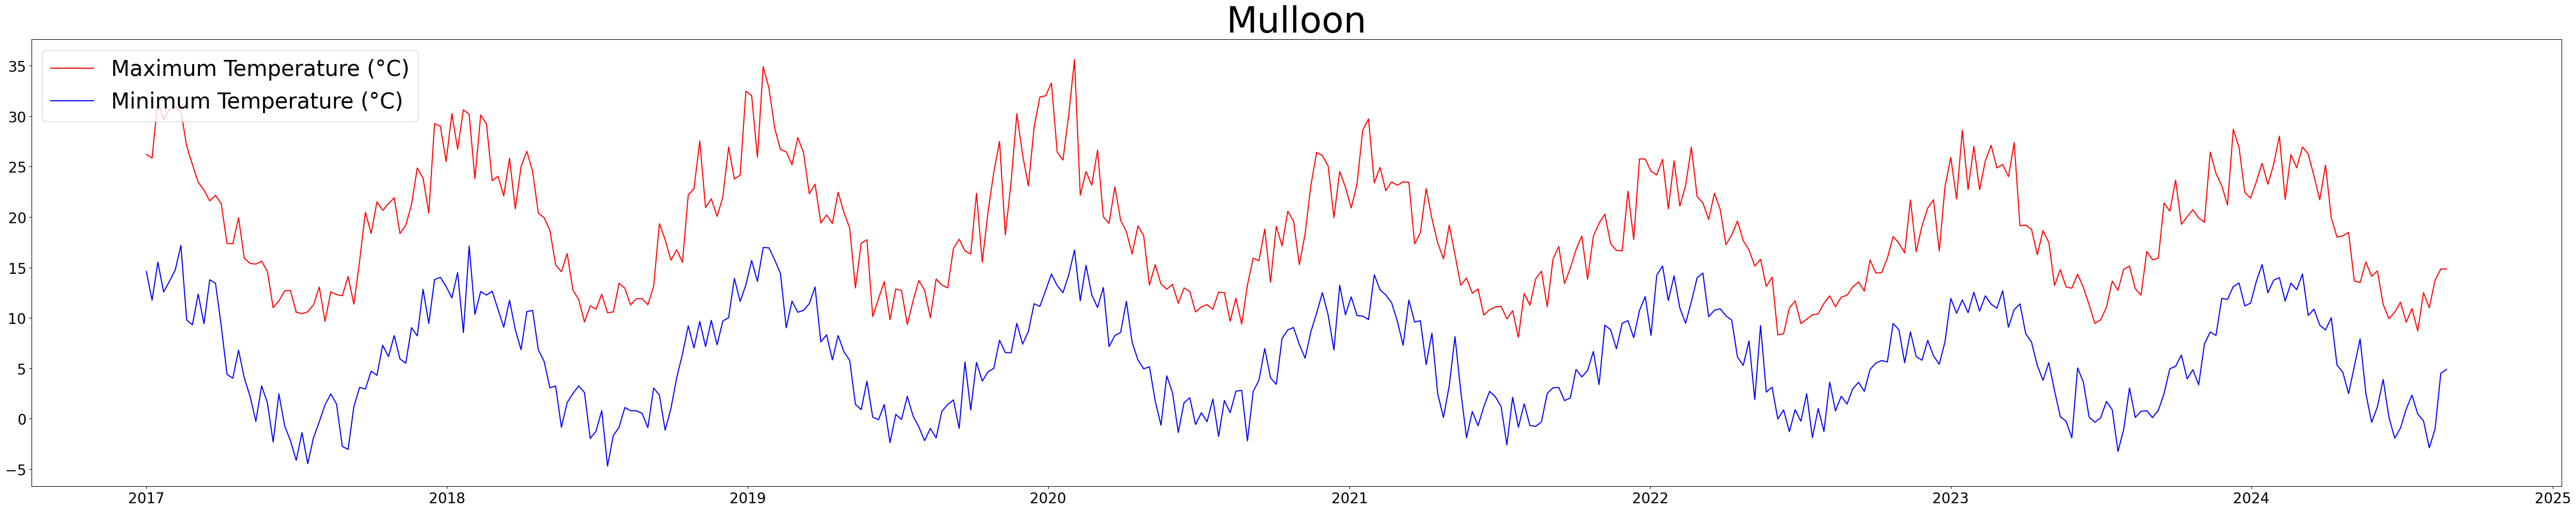

In [51]:
# Temperature plot
plt.figure(figsize=(50, 10))
maxtemp_plot = plt.plot(weekly_df.index, weekly_df["Maximum temperature"], color='red')
mintemp_plot = plt.plot(weekly_df.index, weekly_df["Minimum temperature"], color='blue')
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  
handles = [maxtemp_plot[0], mintemp_plot[0]]
labels = ['Maximum Temperature (°C)', 'Minimum Temperature (°C)']
plt.legend(handles=handles, labels=labels, fontsize=30, loc='upper left')
plt.title(f'{stubs[stub]}', fontsize=50)
plt.tight_layout()

filename = os.path.join(visuals_dir, f"{stub}_temperature.png")
plt.savefig(filename)
print(filename)

/scratch/xe2/cb8590/Visuals/MULL_weather.png


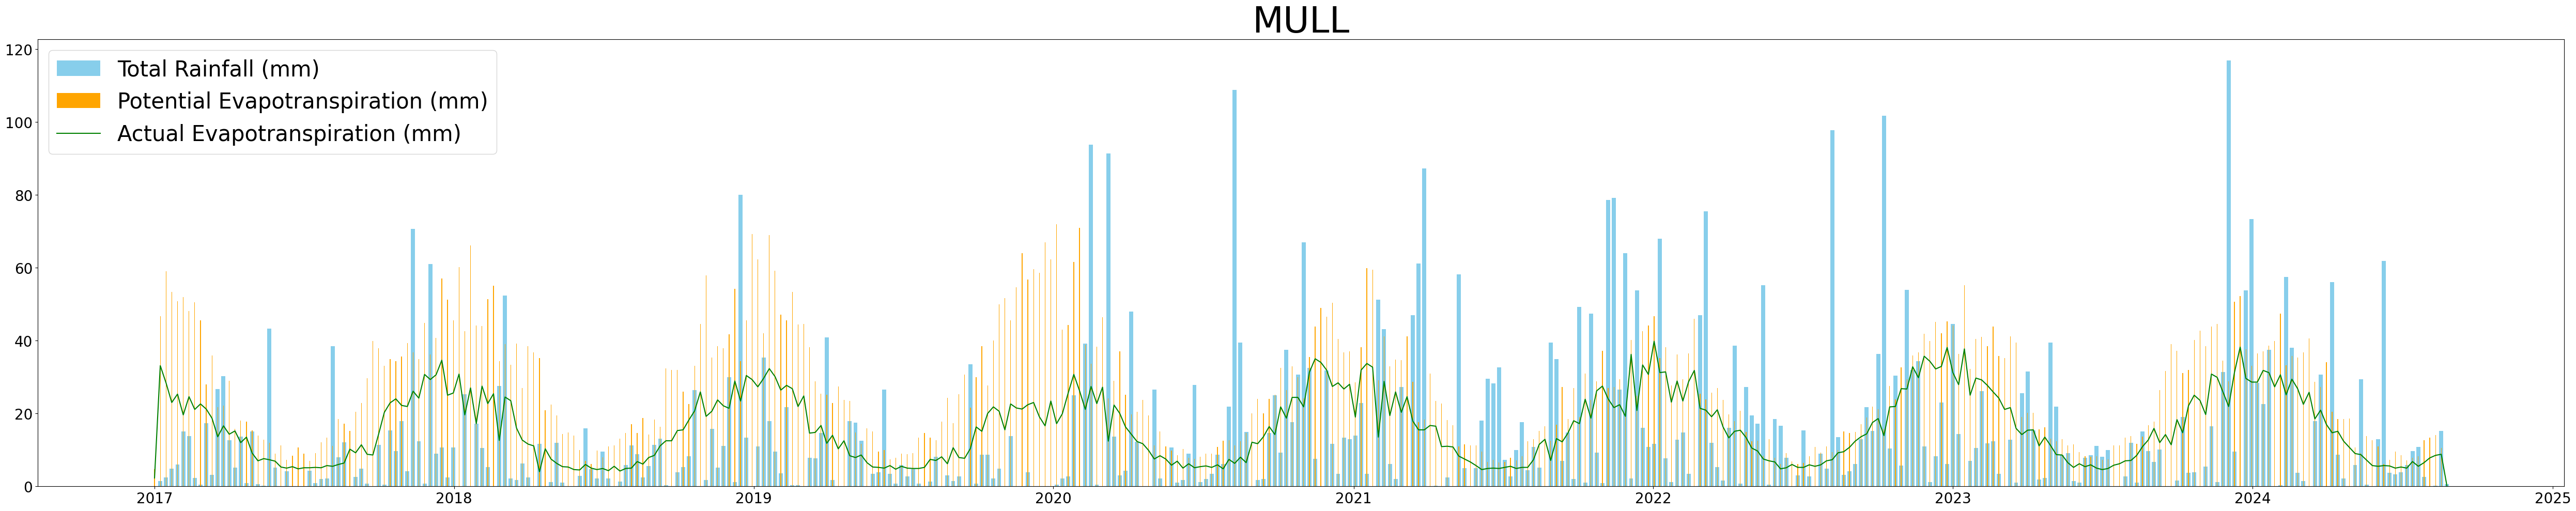

In [62]:
# Rainfall, evapotranspiration, soil moisture plot

plt.figure(figsize=(50, 10))

# Plot the data
rainfall_plot = plt.bar(weekly_df.index, weekly_df['Rainfall'], color='skyblue', width=5)
et_actual_plot = plt.bar(weekly_df.index, weekly_df['Potential Evapotranspiration'], color='orange')
et_potential_plot = plt.plot(weekly_df.index, weekly_df['Actual Evapotranspiration'], color='green')

# moistures = ["Ssoil1", "Ssoil2", "Ssoil3", "Ssoil4"]
# moisture_plots = []
# for i in range(1,5):
#     moisture_plot = plt.plot(weekly_df.index, weekly_df[f"Ssoil{i}"]/10, color='blue')
#     moisture_plots.append(moisture_plot)

# Adjust the size of the tick labels on the x-axis and y-axis
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)  

# Reorder the legend items
handles = [rainfall_plot, et_actual_plot[0], et_potential_plot[0]]
labels = ['Total Rainfall (mm)', "Potential Evapotranspiration (mm)", "Actual Evapotranspiration (mm)"]
plt.legend(handles=handles, labels=labels, fontsize=30, loc='upper left')
plt.title(f'{stub}', fontsize=50)

plt.tight_layout()

filename = os.path.join(visuals_dir, f"{stub}_weather.png")
plt.savefig(filename)
print(filename)